In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
#concatenate data for years 2024 and 2025
df_2024 = pd.read_csv("../01_raw_data/ttc-subway-delay-data-2024.csv")

df_2025 = pd.read_csv("../01_raw_data/TTC Subway Delay Data since 2025.csv")

df_2025 = df_2025.drop(columns='_id')
#Dates
df_2024['Date'] = pd.to_datetime(df_2024['Date'])
df_2025['Date'] = pd.to_datetime(df_2025['Date'], format='%Y-%m-%d')

#Combined data frame

df = pd.concat([df_2024, df_2025], ignore_index=True)
df.head()
#Droping

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0.0,0.0,N,YU,5491.0
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0.0,0.0,N,YU,0.0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4.0,10.0,N,YU,6051.0
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10.0,16.0,E,BD,5284.0
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4.0,10.0,N,YU,5986.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28571 entries, 0 to 28570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       28571 non-null  datetime64[ns]
 1   Time       28571 non-null  object        
 2   Day        28571 non-null  object        
 3   Station    28571 non-null  object        
 4   Code       28571 non-null  object        
 5   Min Delay  27275 non-null  float64       
 6   Min Gap    27230 non-null  float64       
 7   Bound      18329 non-null  object        
 8   Line       28522 non-null  object        
 9   Vehicle    27754 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 2.2+ MB


In [4]:
df['Line'].unique()

array(['YU', 'BD', 'YUS', 'YU/BD', 'SHP', nan, 'BLOOR DANFORTH',
       'YU / BD', 'YU/ BD', 'SRT', 'YUS/BD', 'SHEP', 'LINE 1',
       'TRACK LEVEL ACTIVITY', 'YU & BD', '109 RANEE',
       'ONGE-UNIVERSITY AND BL', 'YU/BD/SHP', 'BD/ YUS', 'BD/ YU',
       'BD/YU', 'BD / YU', '20 CLIFFSIDE'], dtype=object)

In [5]:
#Removing SRT Line

df = df[df['Line'] != 'SRT']
df['Line'].unique()

array(['YU', 'BD', 'YUS', 'YU/BD', 'SHP', nan, 'BLOOR DANFORTH',
       'YU / BD', 'YU/ BD', 'YUS/BD', 'SHEP', 'LINE 1',
       'TRACK LEVEL ACTIVITY', 'YU & BD', '109 RANEE',
       'ONGE-UNIVERSITY AND BL', 'YU/BD/SHP', 'BD/ YUS', 'BD/ YU',
       'BD/YU', 'BD / YU', '20 CLIFFSIDE'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28569 entries, 0 to 28570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       28569 non-null  datetime64[ns]
 1   Time       28569 non-null  object        
 2   Day        28569 non-null  object        
 3   Station    28569 non-null  object        
 4   Code       28569 non-null  object        
 5   Min Delay  27273 non-null  float64       
 6   Min Gap    27228 non-null  float64       
 7   Bound      18329 non-null  object        
 8   Line       28520 non-null  object        
 9   Vehicle    27752 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 2.4+ MB


In [7]:
 #count isnull values per column
print(df.isnull().sum())

Date             0
Time             0
Day              0
Station          0
Code             0
Min Delay     1296
Min Gap       1341
Bound        10240
Line            49
Vehicle        817
dtype: int64


In [13]:
#drop 'Bound' isnull
df_cleaned = df.dropna(subset=['Bound','Vehicle','Line'])

In [14]:
 #count isnull values per column
print(df_cleaned.isnull().sum())

Date           0
Time           0
Day            0
Station        0
Code           0
Min Delay    467
Min Gap      512
Bound          0
Line           0
Vehicle        0
dtype: int64


In [15]:
# Converting 'datetime' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

In [16]:
# Creating new features from 'Date' column
df_cleaned['Month'] = df_cleaned['Date'].dt.month
print(df_cleaned.head())

        Date   Time     Day             Station   Code  Min Delay  Min Gap  \
0 2024-01-01  02:00  Monday    SHEPPARD STATION    MUI        0.0      0.0   
1 2024-01-01  02:00  Monday      DUNDAS STATION   MUIS        0.0      0.0   
2 2024-01-01  02:08  Monday      DUNDAS STATION  MUPAA        4.0     10.0   
3 2024-01-01  02:13  Monday  KENNEDY BD STATION  PUTDN       10.0     16.0   
4 2024-01-01  02:22  Monday       BLOOR STATION  MUPAA        4.0     10.0   

  Bound Line  Vehicle  Month  
0     N   YU   5491.0      1  
1     N   YU      0.0      1  
2     N   YU   6051.0      1  
3     E   BD   5284.0      1  
4     N   YU   5986.0      1  


In [17]:
# add dataset for Code categories
df_code = pd.read_csv("../02_data_processing/code_category_description.csv")
print(df_code)


    Delay Code                                 Category  \
0         EUAC  Mechanical/Electrical/Vehicle Equipment   
1         EUAL  Mechanical/Electrical/Vehicle Equipment   
2        EUATC  Mechanical/Electrical/Vehicle Equipment   
3         EUBK  Mechanical/Electrical/Vehicle Equipment   
4         EUBO  Mechanical/Electrical/Vehicle Equipment   
..         ...                                      ...   
124        TUS                  Transportation/Operator   
125       TUSC                  Transportation/Operator   
126      TUSET                  Transportation/Operator   
127       TUST                         Weather/External   
128      TUSUP                  Transportation/Operator   

                                           Description  
0           Train HVAC malfunction or underperformance  
1      Issues with onboard or wayside AC power systems  
2    ATC equipment malfunction related to Rail Cars...  
3          Faulty brake components or pneumatic issues  
4     

In [18]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Delay Code   129 non-null    object
 1   Category     129 non-null    object
 2   Description  129 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [19]:
# Adding 'Category' column from df_code to df_cleanese based on 'Deay code'
df_delay = pd.merge(df_cleaned, df_code[['Delay Code', 'Category']], left_on='Code', right_on = 'Delay Code',how='left')

In [20]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18204 entries, 0 to 18203
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18204 non-null  datetime64[ns]
 1   Time        18204 non-null  object        
 2   Day         18204 non-null  object        
 3   Station     18204 non-null  object        
 4   Code        18204 non-null  object        
 5   Min Delay   17737 non-null  float64       
 6   Min Gap     17692 non-null  float64       
 7   Bound       18204 non-null  object        
 8   Line        18204 non-null  object        
 9   Vehicle     18204 non-null  float64       
 10  Month       18204 non-null  int32         
 11  Delay Code  18159 non-null  object        
 12  Category    18159 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 1.7+ MB


In [21]:
# Printing new dataframe after creation of new features
print(df_delay.head())

        Date   Time     Day             Station   Code  Min Delay  Min Gap  \
0 2024-01-01  02:00  Monday    SHEPPARD STATION    MUI        0.0      0.0   
1 2024-01-01  02:00  Monday      DUNDAS STATION   MUIS        0.0      0.0   
2 2024-01-01  02:08  Monday      DUNDAS STATION  MUPAA        4.0     10.0   
3 2024-01-01  02:13  Monday  KENNEDY BD STATION  PUTDN       10.0     16.0   
4 2024-01-01  02:22  Monday       BLOOR STATION  MUPAA        4.0     10.0   

  Bound Line  Vehicle  Month Delay Code                           Category  
0     N   YU   5491.0      1        MUI              Medical/Injury/Safety  
1     N   YU      0.0      1       MUIS              Medical/Injury/Safety  
2     N   YU   6051.0      1      MUPAA  Door/Passenger/Platform Incidents  
3     E   BD   5284.0      1      PUTDN        Track/Infrastructure/Debris  
4     N   YU   5986.0      1      MUPAA  Door/Passenger/Platform Incidents  


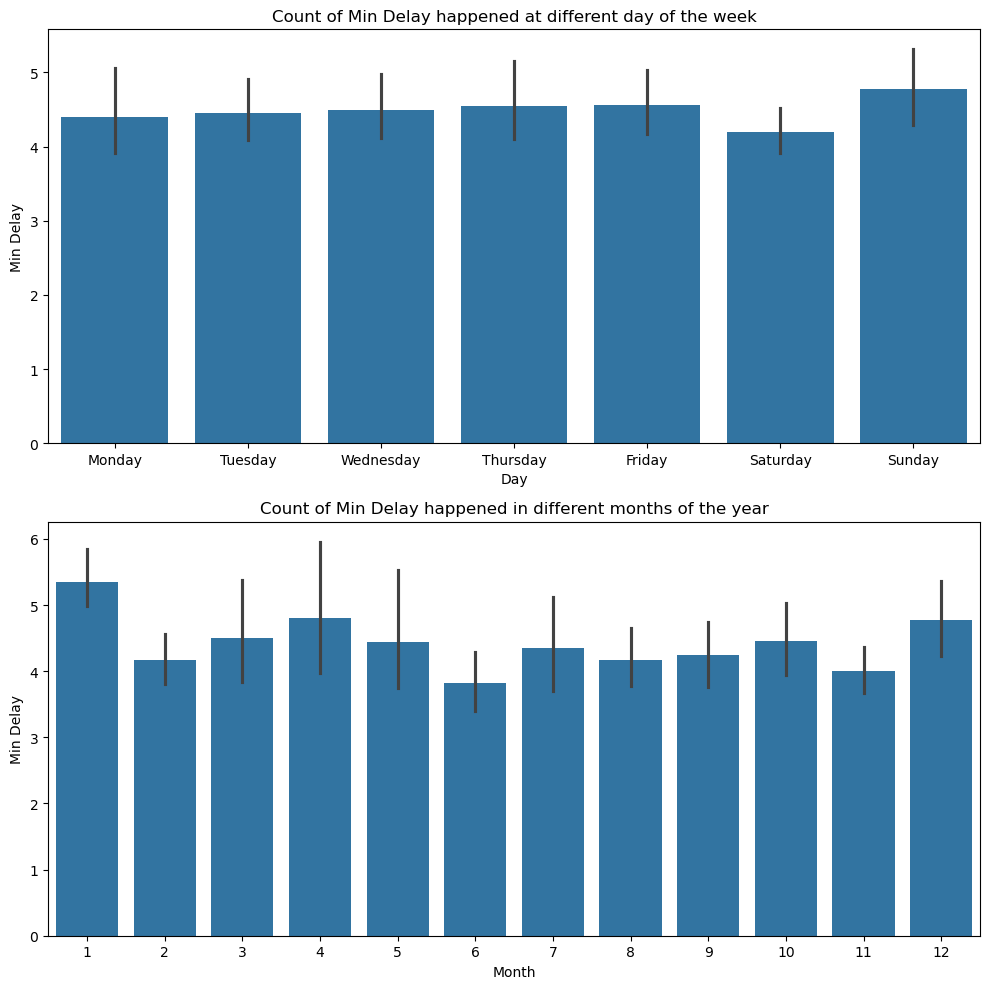

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

#  Analyzing trends - Visualizing the count of Min Delay happened different day of the week
sns.barplot(x=df_delay['Day'], y=df_delay['Min Delay'],ax=ax[0])
ax[0].set_title('Count of Min Delay happened at different day of the week')

# Analyzing trends - Visualizing the count of Min Delay happened in different months of the year
sns.barplot(x=df_delay['Month'], y=df_delay['Min Delay'], ax=ax[1])
ax[1].set_title('Count of Min Delay happened in different months of the year')


plt.tight_layout()
plt.show()

In [23]:
#develop a classification model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18204 entries, 0 to 18203
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18204 non-null  datetime64[ns]
 1   Time        18204 non-null  object        
 2   Day         18204 non-null  object        
 3   Station     18204 non-null  object        
 4   Code        18204 non-null  object        
 5   Min Delay   17737 non-null  float64       
 6   Min Gap     17692 non-null  float64       
 7   Bound       18204 non-null  object        
 8   Line        18204 non-null  object        
 9   Vehicle     18204 non-null  float64       
 10  Month       18204 non-null  int32         
 11  Delay Code  18159 non-null  object        
 12  Category    18159 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 1.7+ MB


In [25]:
#clean the dataset and perform data transformation
df_delay = df_delay.dropna(subset=['Min Delay', 'Min Gap'])

X = df_delay.drop('Min Delay', axis=1)
y = df_delay['Min Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Min Gap']
#categorical_features = ['Station', 'Code', 'Bound','Line','Vehicle','Category']
categorical_features = [ 'Bound','Line','Category', 'Day', 'Month']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [26]:
#data processing for developing the ML model.

from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


joblib.dump(model, 'ttc_delay_logistic_regression_model.joblib')
joblib.dump(preprocessor, 'ttc_delay_preprocessor.joblib')

accuracy = model.score(X_test, y_test)
print(accuracy)
 

0.6241876236224922


c:\Users\User\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


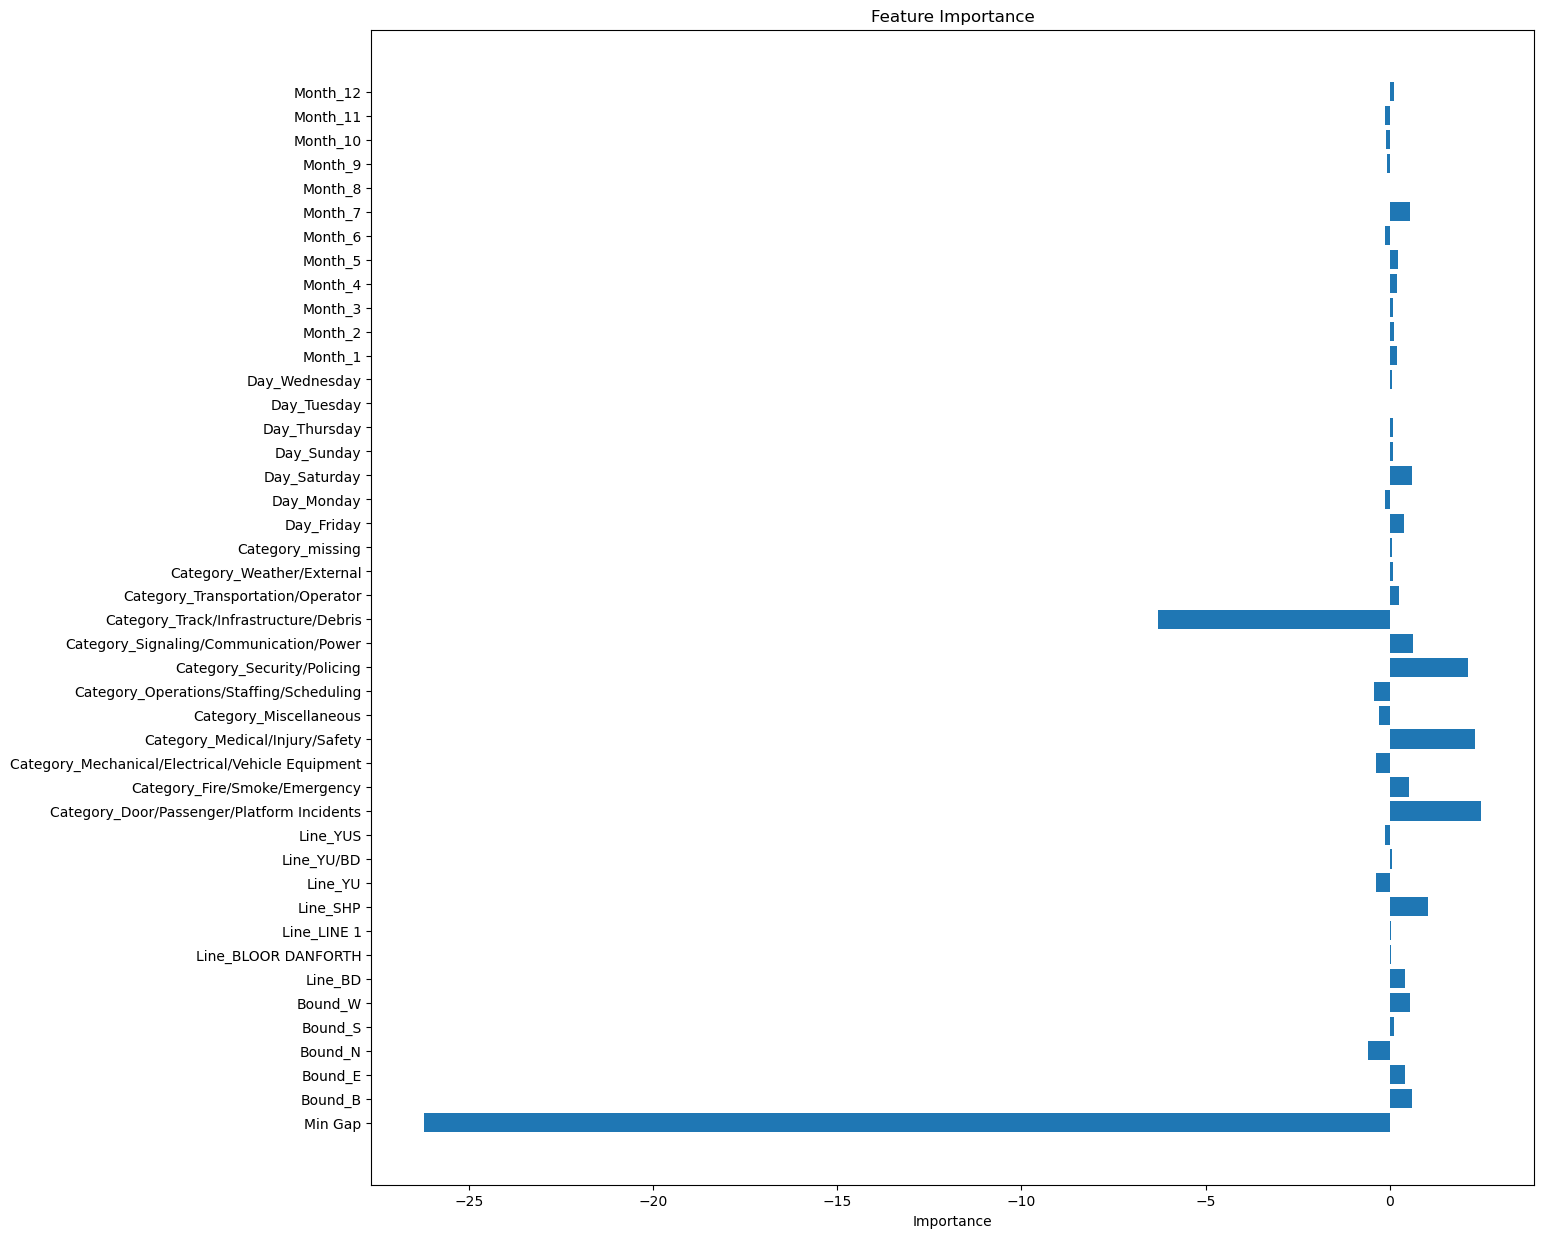

In [27]:
# visualize the importance of the model features 
import matplotlib.pyplot as plt
import numpy as np

importance = model.coef_[0]
features = np.array(numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(15, 15))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()